## **Importing the Libraries`**

In [1]:
# Step 1: Importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [2]:
import sklearn

# Step 2: Print versions
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("Scikit-learn version:", sklearn.__version__)

Pandas version: 2.2.2
NumPy version: 2.0.2
Scikit-learn version: 1.6.1


## **Read the Dataset**

In [3]:
# Step 2: Load dataset
file_path = "/content/patient_data.csv"
df = pd.read_csv(file_path)

# Renaming column 'C' to 'Gender'
df.rename(columns={'C': 'Gender'}, inplace=True)

# Display first few rows
print("Initial Dataset:")
df.head()


Initial Dataset:


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


## **Check for Missing Values**

In [4]:
# Step 3: Checking for missing values
print("Missing Values in each column:")
print(df.isnull().sum())


Missing Values in each column:
Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64


## **Fix Inconsistencies in 'Stages' Column**

In [5]:
# Step 4: Cleaning 'Stages' column
df['Stages'] = df['Stages'].str.upper().str.strip()  # Make all uppercase & remove spaces

# Replacing inconsistent labels with standardized ones
df['Stages'] = df['Stages'].replace({
    'HYPERTENSION (STAGE-1)': 'HYPERTENSION STAGE-1',
    'HYPERTENSION (STAGE-2)': 'HYPERTENSION STAGE-2',
    'HYPERTENSION (STAGE-3)': 'HYPERTENSION STAGE-3',
    'PREHYPERTENSION': 'PRE-HYPERTENSION',
    'NORMAL': 'NORMAL'
})

print("Unique Stage values after cleaning:")
print(df['Stages'].unique())


Unique Stage values after cleaning:
['HYPERTENSION STAGE-1' 'HYPERTENSION STAGE-2' 'HYPERTENSIVE CRISIS'
 'HYPERTENSION (STAGE-2).' 'HYPERTENSIVE CRISI' 'NORMAL']


## **Handling Categorical Values (Encoding)**

In [6]:
# Step 5: Encoding all categorical columns using LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Save encoder for decoding later

print("Dataset after encoding:")
df.head()


Dataset after encoding:


,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,1,0,1,0,0,0,0,0,1,1,1,3,0,1
1,0,0,1,0,0,0,0,0,1,1,1,3,0,1
2,1,1,1,0,0,0,0,0,1,1,1,3,0,1
3,0,1,1,0,0,0,0,0,1,1,1,3,0,1
4,1,2,1,0,0,0,0,0,1,1,1,3,0,1


## **Exploratory Data Analysis (EDA)**


# **1: Descriptive Statistical Analysis**

In [7]:
# Step 1: Descriptive Statistics
print("Descriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
            Gender          Age      History      Patient  TakeMedication  \
count  1825.000000  1825.000000  1825.000000  1825.000000     1825.000000   
mean      0.499726     1.441096     0.907945     0.460822        0.921096   
std       0.500137     1.098723     0.289183     0.498599        0.854759   
min       0.000000     0.000000     0.000000     0.000000        0.000000   
25%       0.000000     0.000000     1.000000     0.000000        0.000000   
50%       0.000000     1.000000     1.000000     0.000000        1.000000   
75%       1.000000     2.000000     1.000000     1.000000        2.000000   
max       1.000000     3.000000     1.000000     1.000000        2.000000   

          Severity  BreathShortness  VisualChanges  NoseBleeding  \
count  1825.000000      1825.000000    1825.000000   1825.000000   
mean      1.013151         0.465205       0.484932      1.026849   
std       0.786287         0.498925       0.499910      0.678493   
min       

## **2: Visual Analysis**

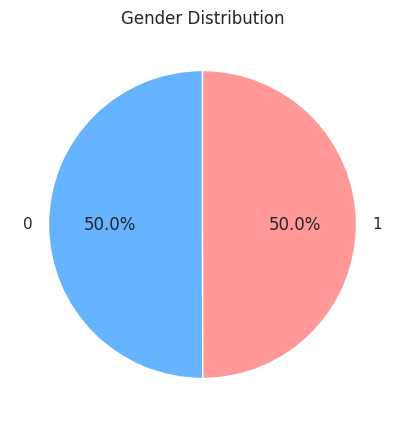

/tmp/ipython-input-8-3166800365.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Stages', data=df, palette='viridis')


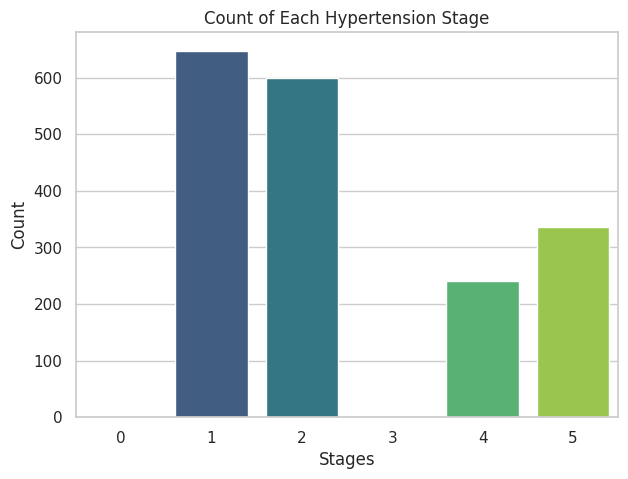

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for plots
sns.set(style="whitegrid")

# Gender Distribution - Pie chart
plt.figure(figsize=(5,5))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Gender Distribution")
plt.ylabel('')
plt.show()

# Stages Distribution - Bar chart
plt.figure(figsize=(7,5))
sns.countplot(x='Stages', data=df, palette='viridis')
plt.title("Count of Each Hypertension Stage")
plt.xlabel("Stages")
plt.ylabel("Count")
plt.show()


## **3: Univariate Analysis**


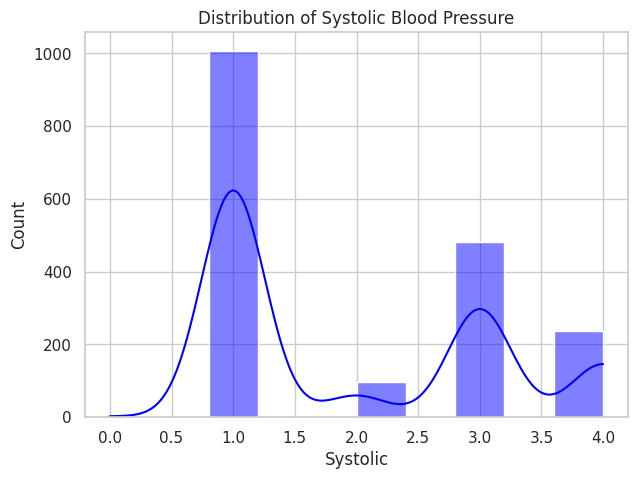

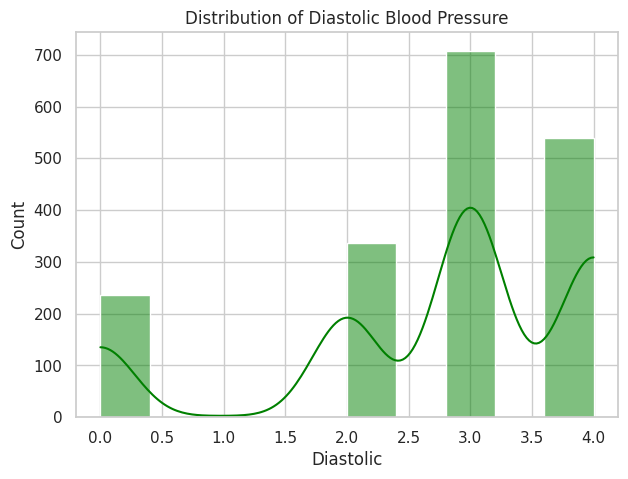

In [9]:
# Distribution of Systolic BP
plt.figure(figsize=(7,5))
sns.histplot(df['Systolic'], kde=True, color='blue', bins=10)
plt.title("Distribution of Systolic Blood Pressure")
plt.show()

# Distribution of Diastolic BP
plt.figure(figsize=(7,5))
sns.histplot(df['Diastolic'], kde=True, color='green', bins=10)
plt.title("Distribution of Diastolic Blood Pressure")
plt.show()


## **4: Bivariate Analysis**

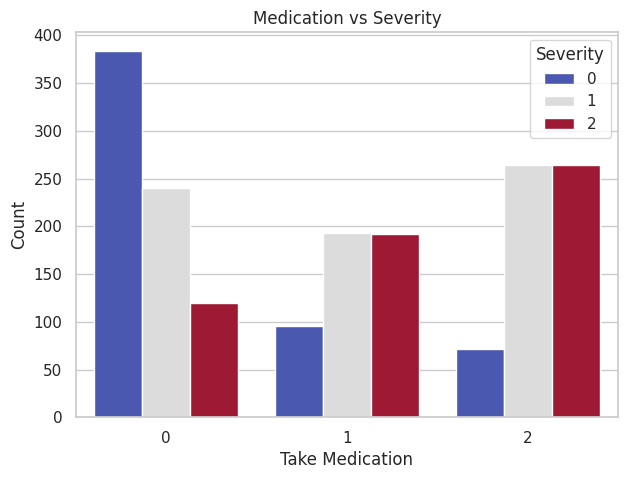

In [10]:
# Relationship between 'TakeMedication' & 'Severity'
plt.figure(figsize=(7,5))
sns.countplot(x='TakeMedication', hue='Severity', data=df, palette='coolwarm')
plt.title("Medication vs Severity")
plt.xlabel("Take Medication")
plt.ylabel("Count")
plt.show()


## **5: Multivariate Analysis**

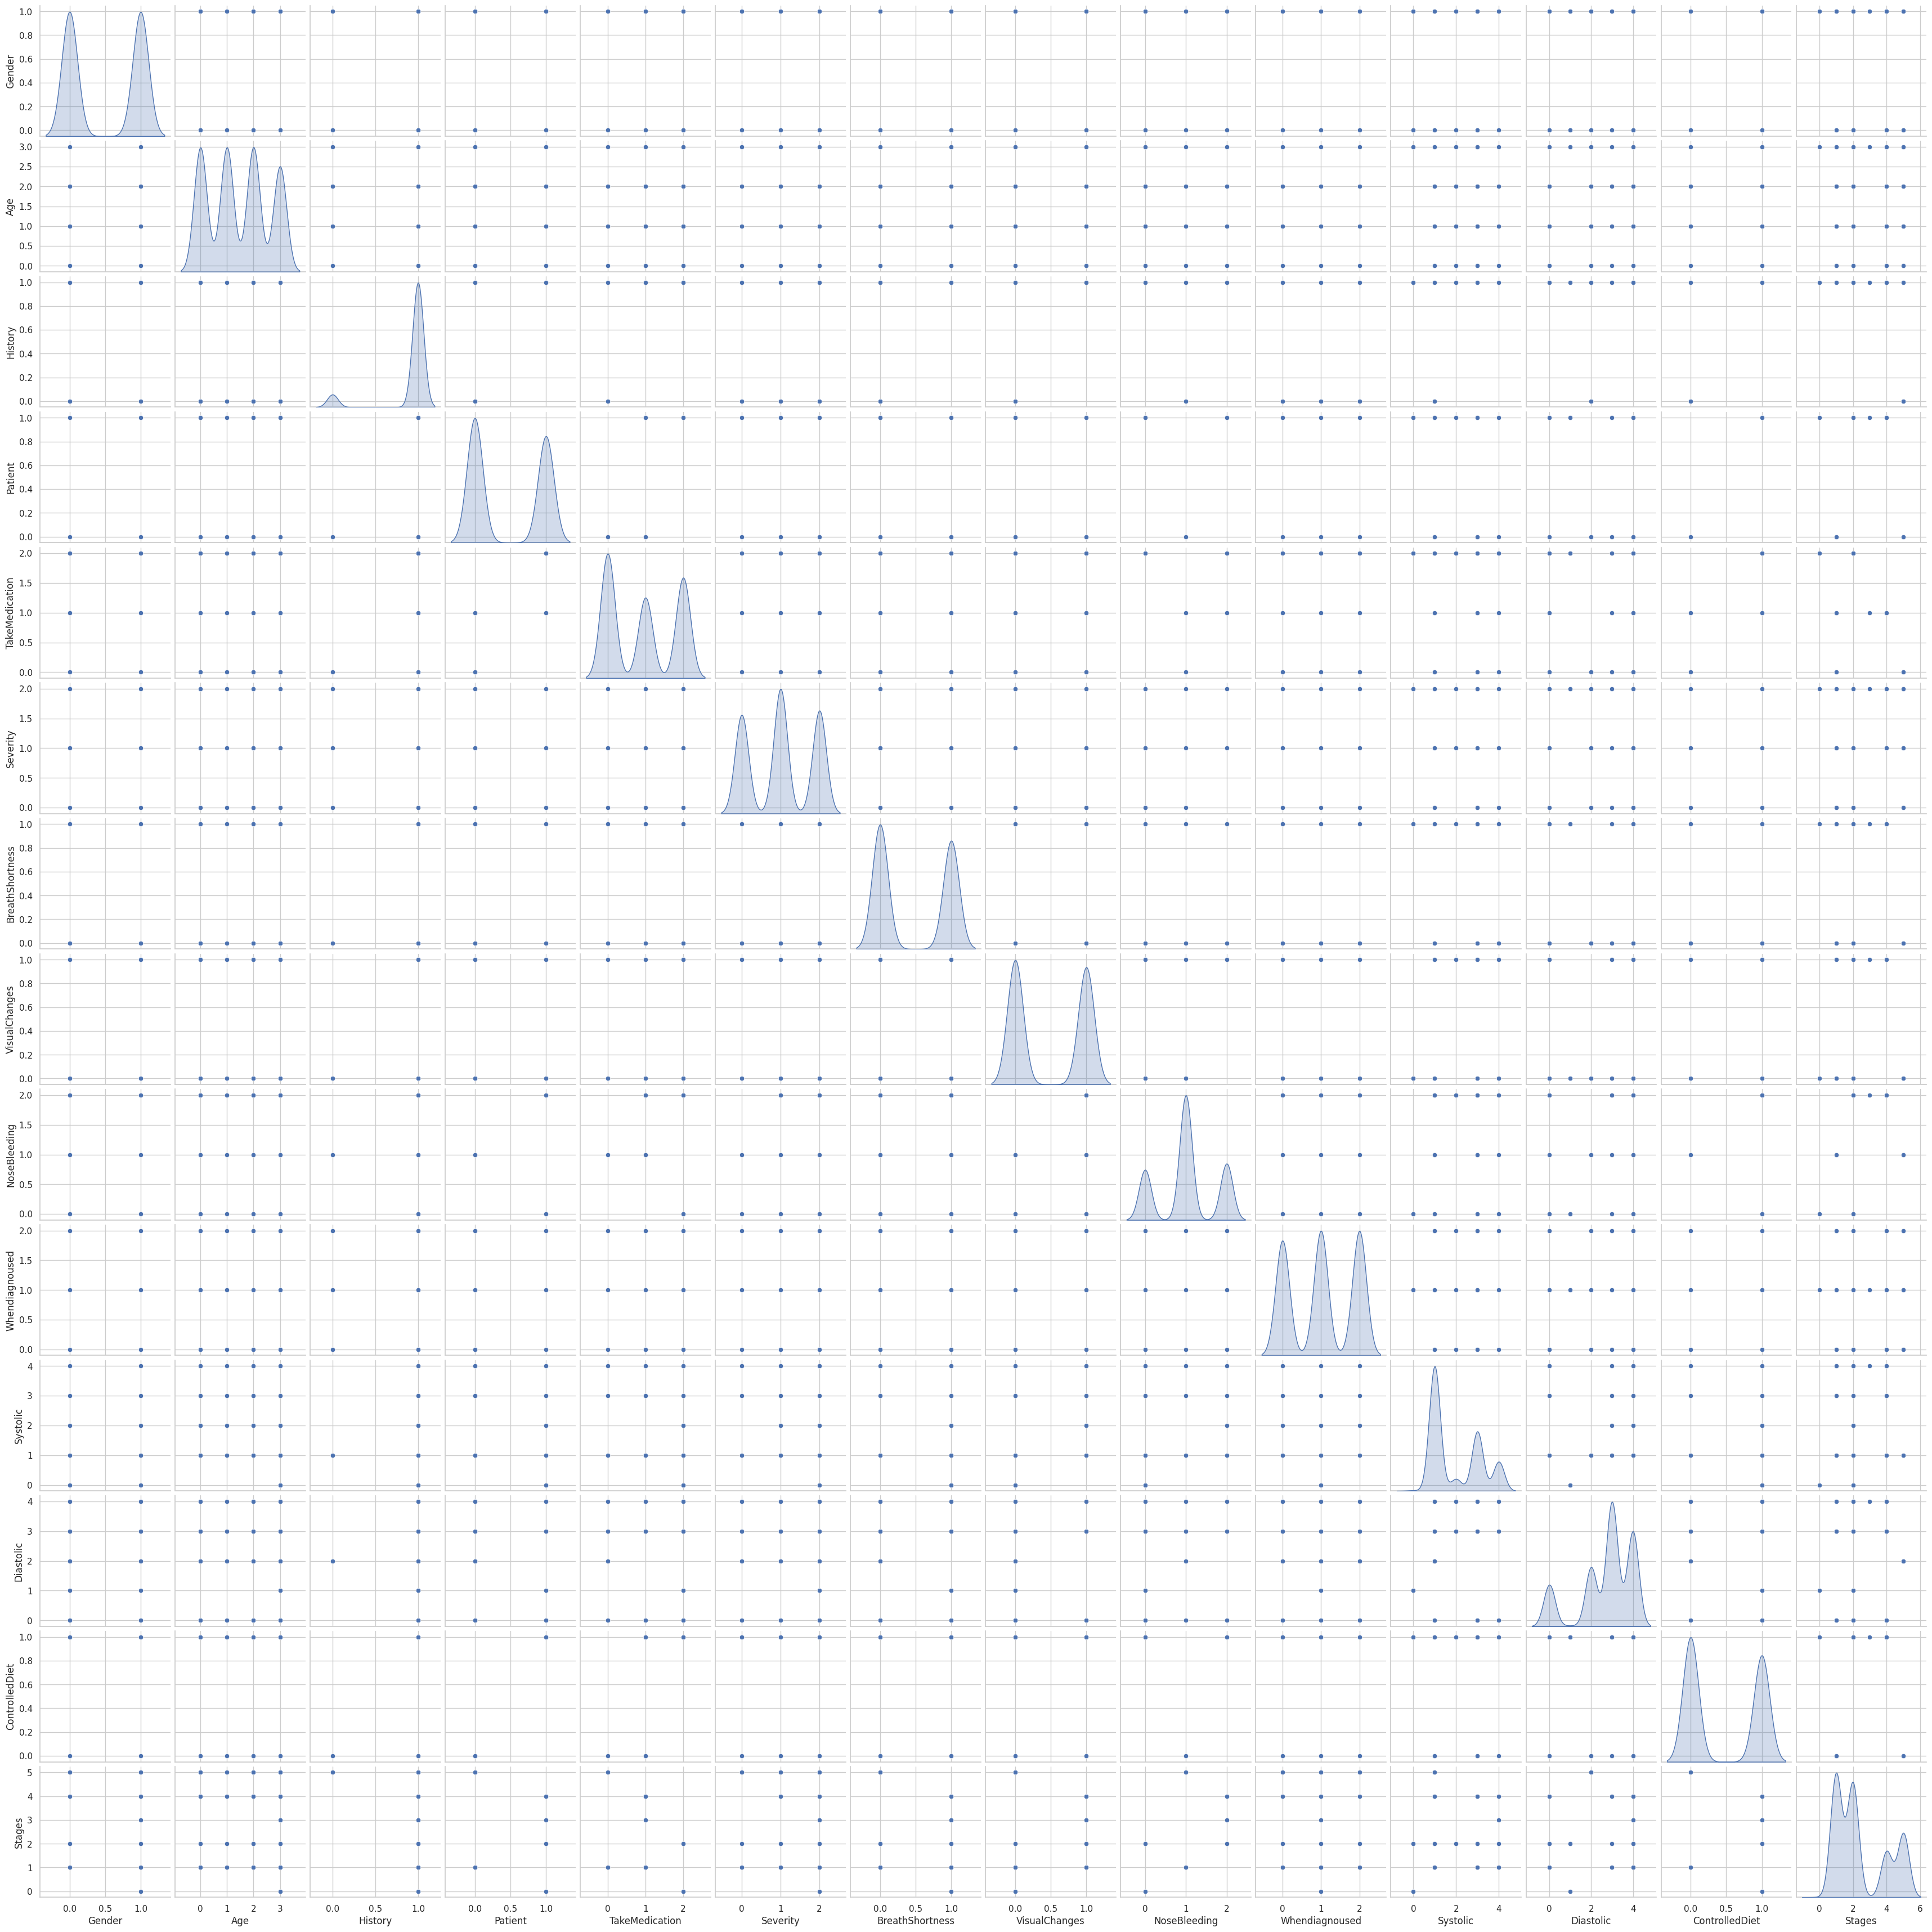

In [11]:
# Pairplot for multivariate relationships
sns.pairplot(df, diag_kind='kde')
plt.show()


## **6. Splitting Data into Train & Test**

In [12]:
from sklearn.model_selection import train_test_split

# Splitting features (X) & target (y)
X = df.drop(columns=['Stages'])
y = df['Stages']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1460, 13)
Test shape: (365, 13)


## Model Building & Evaluation

## **Import Required Libraries**

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

## **Logistic Regression Model**

In [14]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression:
Accuracy: 0.9863013698630136
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       139
           2       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       0.92      1.00      0.96        60

    accuracy                           0.99       365
   macro avg       0.98      0.99      0.99       365
weighted avg       0.99      0.99      0.99       365



## **Random Forest Model**

In [15]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



## **Decision Tree Model**

In [16]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.9972602739726028
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00       120
           3       0.00      0.00      0.00         0
           4       1.00      0.98      0.99        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       0.80      0.80      0.80       365
weighted avg       1.00      1.00      1.00       365



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Gaussian Naive Bayes**

In [17]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


Gaussian Naive Bayes:
Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       139
           2       1.00      1.00      1.00       120
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        60

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



## **Multinomial Naive Bayes**




In [18]:
# Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

print("Multinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_mnb))
print(classification_report(y_test, y_pred_mnb))

Multinomial Naive Bayes:
Accuracy: 0.8438356164383561
              precision    recall  f1-score   support

           1       0.85      0.87      0.86       139
           2       0.88      0.96      0.92       120
           4       0.87      0.72      0.79        46
           5       0.71      0.65      0.68        60

    accuracy                           0.84       365
   macro avg       0.83      0.80      0.81       365
weighted avg       0.84      0.84      0.84       365



## **Compare Model Performances**

In [19]:
# Collect accuracies
accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Gaussian NB": accuracy_score(y_test, y_pred_gnb),
    "Multinomial NB": accuracy_score(y_test, y_pred_mnb),
}

print("Model Accuracies:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

# Select best model
best_model = max(accuracies, key=accuracies.get)
print("\nBest Performing Model:", best_model)

Model Accuracies:
Logistic Regression: 0.9863
Random Forest: 1.0000
Decision Tree: 0.9973
Gaussian NB: 1.0000
Multinomial NB: 0.8438

Best Performing Model: Random Forest


## **Testing the Best Model**

In [20]:
# Use the best model for final prediction
final_model = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "Decision Tree": dt,
    "Gaussian NB": gnb,
    "Multinomial NB": mnb
}[best_model]

sample_prediction = final_model.predict(X_test[:5])
print("Sample Predictions:", sample_prediction)

Sample Predictions: [4 5 4 1 2]


## **Import Metrics**

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## **Define a Function for Model Evaluation**

In [22]:
# Function to evaluate model performance with multiple metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    return acc, prec, rec, f1, cm

## **Evaluate All Models**

In [23]:
# Evaluate each trained model
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf,
    "Decision Tree": dt,
    "Gaussian NB": gnb,
    "Multinomial NB": mnb
}

results = {}
for name, model in models.items():
    acc, prec, rec, f1, cm = evaluate_model(model, X_test, y_test)
    results[name] = [acc, prec, rec, f1]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Compare Models in a DataFrame**

In [24]:
# Create a comparison DataFrame
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"]).T
print("Model Performance Comparison:")
print(results_df)

Model Performance Comparison:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.986301   0.987355  0.986301  0.986450
Random Forest        1.000000   1.000000  1.000000  1.000000
Decision Tree        0.997260   1.000000  0.997260  0.998615
Gaussian NB          1.000000   1.000000  1.000000  1.000000
Multinomial NB       0.843836   0.841343  0.843836  0.840950


## **Visual Comparison**

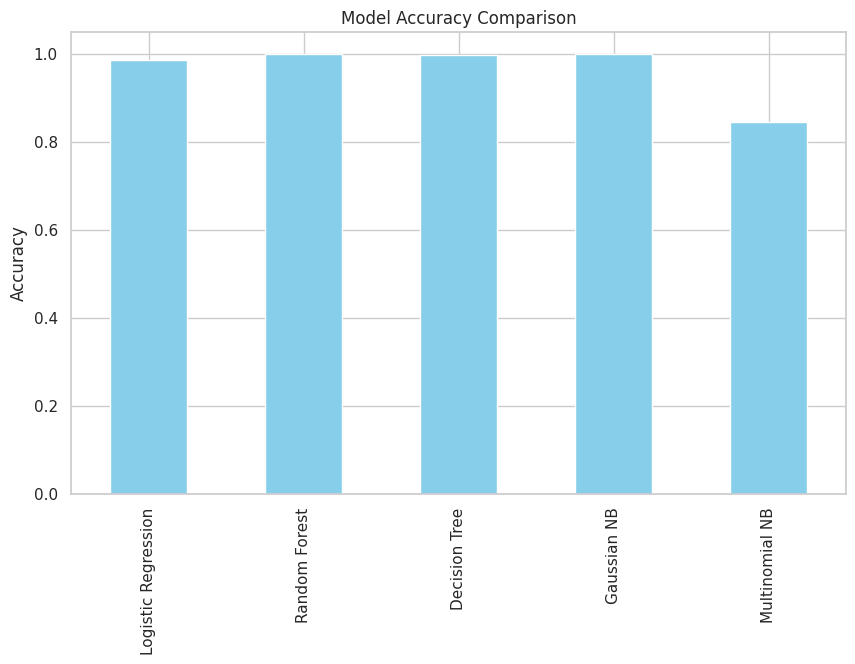

In [25]:
# Plotting model performance
plt.figure(figsize=(10,6))
results_df['Accuracy'].plot(kind='bar', color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

## **Save the Best Model**

In [26]:
import joblib

# Save the best model (Random Forest in this case)
best_model = rf  # If you prefer Gaussian NB, replace with 'gnb'
joblib.dump(best_model, "best_model.pkl")
print("Best model saved as best_model.pkl")

Best model saved as best_model.pkl
